# Load Pretrained Model

In [1]:
import torch 

from brainnet.config import get_cfg_defaults
cfg = get_cfg_defaults()

from brainnet.backbone import ModifiedCLIP
backbone = ModifiedCLIP()

from brainnet.plmodel import PLModel
plmodel = PLModel(cfg, backbone, skip_data=True)

checkpoint = 'https://raw.githubusercontent.com/huzeyann/BrainDecodesDeepNets/main/assets/weights/clip_factorTopy.pth'
plmodel.model.load_state_dict(torch.hub.load_state_dict_from_url(checkpoint, progress=True))
plmodel = plmodel.eval()

/usr/local/lib/python3.8/site-packages/cortex/utils.py:1023: UserWarning: fsaverage is already present in the database. Set download_again to True if you wish to download the subject again.
  warnings.warn(


# Load Input Image

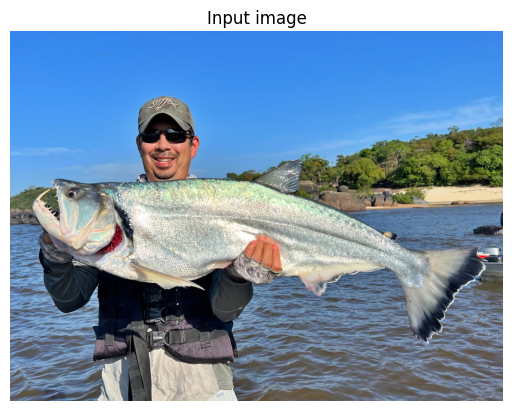

In [2]:
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

import urllib.request
from PIL import Image

urllib.request.urlretrieve(
    "https://github.com/huzeyann/BrainDecodesDeepNets/blob/main/assets/catchafish.jpg?raw=true",
    "catchafish.jpg",
)

input_img = Image.open("catchafish.jpg")

plt.imshow(input_img)
plt.axis("off")
plt.title("Input image")
plt.show()
plt.close()

image = input_img.convert("RGB")
transforms = transforms.Compose(
    [
        transforms.Resize(cfg.DATASET.RESOLUTION),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]
)
image = transforms(image).unsqueeze(0)

## Make Brain Prediction

In [3]:
with torch.no_grad():
    brain_value, _ = plmodel.forward(image)

/github/BrainDecodesDeepNets/brainnet/plot_utils.py:353: RuntimeWarning: invalid value encountered in divide
  fsaverage /= 0  # nan to make other vertices transparent


Failed to get connection
** (org.inkscape.Inkscape:84659): CRITICAL **: 03:25:55.063: dbus_g_proxy_new_for_name: assertion 'connection != NULL' failed
** (org.inkscape.Inkscape:84659): CRITICAL **: 03:25:55.063: dbus_g_proxy_call: assertion 'DBUS_IS_G_PROXY (proxy)' failed
** (org.inkscape.Inkscape:84659): CRITICAL **: 03:25:55.063: dbus_g_connection_register_g_object: assertion 'connection != NULL' failed
** (org.inkscape.Inkscape:84659): WARNING **: 03:25:55.141: Fonts dir '/usr/share/inkscape/fonts' does not exist and will be ignored.
Background RRGGBBAA: ffffff00
Area 0:0:2274.66:1024 exported to 2275 x 1024 pixels (96 dpi)


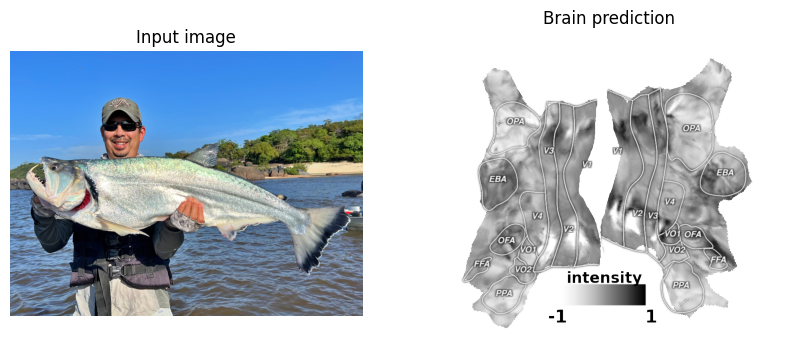

In [4]:
## plot brain prediction
from brainnet.plot_utils import make_1d_plot

# write to a png file
make_1d_plot(
    brain_value,
    "brain.png",
    cmap="Greys",
    cbartext="intensity",
    vmin=-1,
    vmax=1,
    cbar=True,
    overlay=True,
)

# display the png file
brain_img = Image.open("brain.png")

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(input_img)
ax[0].axis("off")
ax[0].set_title("Input image")
ax[1].imshow(brain_img)
ax[1].axis("off")
ax[1].set_title("Brain prediction")
plt.show()

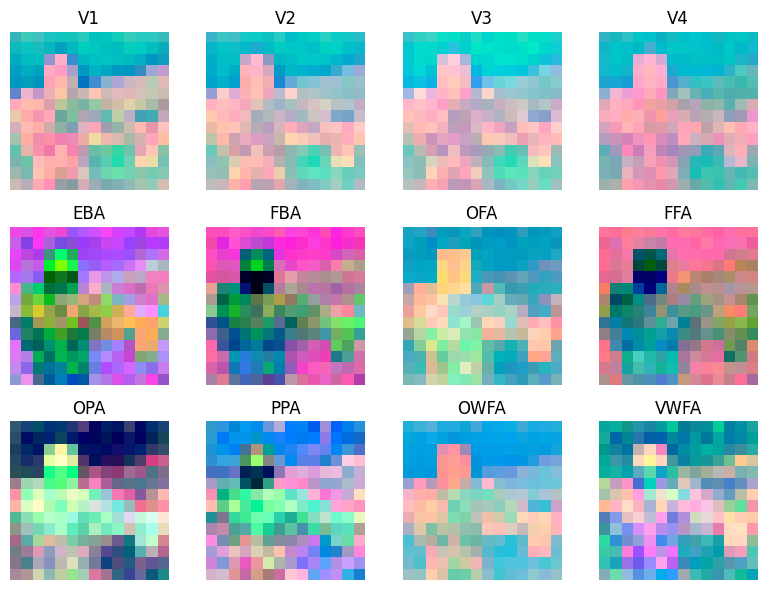

In [5]:
# image space PCA display of top selected channels
top_channels = plmodel.draw_top_channels(image)